# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

In [68]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

import os
from IPython.display import Markdown

def get_data(url):
    local_file = os.path.join(os.getenv('PUIDATA', './'), os.path.basename(url))
    if os.path.isfile(local_file):
        return df.read_csv(local_file)
    else:
        raise OSError('ughhhhh')

Populating the interactive namespace from numpy and matplotlib


/Users/bensteers/Desktop/Storage/NYU/Fall2017/PUI/.direnv/python-3.5.2/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['scatter', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [3]:
# http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
df_pop = pd.read_csv(
    'API_SP.POP.TOTL_DS2_en_csv_v2/API_SP.POP.TOTL_DS2_en_csv_v2.csv', skiprows=3).dropna(how='all', axis=1)
df_pop = df_pop[['Country Name', '2012']].rename(columns={'2012': 'pop'})
df_pop.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [4]:
# http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
df_gdp = pd.read_csv(
    'API_NY.GDP.MKTP.CD_DS2_en_csv_v2/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', skiprows=3).dropna(how='all', axis=1)
df_gdp = df_gdp[['Country Name', '2012']].rename(columns={'2012': 'gdp'})
df_gdp.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153984e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [5]:
df_guns = pd.read_csv('data-pvLFI.csv').rename(columns={'Country': 'Country Name'})
df_guns.head()

,Country Name,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [6]:
df_ms = pd.read_csv('World firearms murders and ownership - Sheet 1.csv')
# cn, average titakm number 
df_ms = df_ms[
    ['Country/Territory', 'Average total all civilian firearms', 'Number of homicides by firearm']
].rename(columns={'Country/Territory': 'Country Name'})
df_ms.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm
0,Albania,270000.0,56.0
1,Algeria,1900000.0,20.0
2,Angola,2800000.0,NaN
3,Anguilla,NaN,1.0
4,Argentina,3950000.0,1198.0


In [16]:
df_dem = df_pop.merge(df_gdp, on="Country Name")
df_guns_ms = df_guns.merge(df_ms, on="Country Name")
df_ = df_dem.merge(df_guns_ms, on="Country Name")
df_.head()

,Country Name,pop,gdp,Guns/100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm
0,Australia,22728254.0,1.538194e+12,15.0,4,3050000.0,30.0
1,Austria,8429991.0,4.074516e+11,30.4,1,2500000.0,18.0
2,Canada,34750545.0,1.824289e+12,30.8,4,9950000.0,173.0
3,Switzerland,7996861.0,6.650541e+11,45.7,2,3400000.0,57.0
4,Germany,80425823.0,3.543984e+12,30.3,7,25000000.0,158.0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


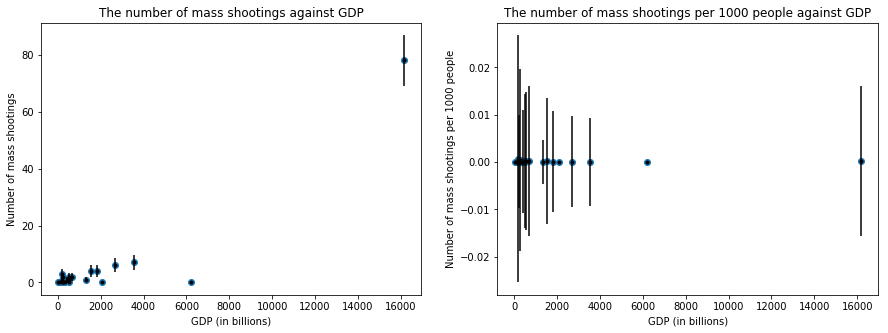


**Figure 1a**: The number of mass shootings vs. GDP, errors represent Poisson statistics. This applies to all subsequent error bars. 
The point in the top right is the US which has the highest GDP and number of mass shootings.

**Figure 1b**: The number of mass shootings per 1,000 people vs. GDP. The point on the right is the US.


In [98]:
pl.figure(figsize=(15,5)) 

x, y = df_.gdp / 1e9, df_['Number of mass shootings']

pl.subplot(1, 2, 1)
pl.scatter(x, y)
pl.errorbar(x, y, yerr=np.sqrt(y * 1.), fmt='.', color='k')
pl.title('The number of mass shootings against GDP')
pl.xlabel("GDP (in billions)")
pl.ylabel("Number of mass shootings")

df_["shootingspp"] = df_["Number of mass shootings"] / df_['pop'] * 1e3
y = df_["shootingspp"]

pl.subplot(1, 2, 2)
pl.scatter(x, y)
pl.errorbar(x, y, yerr=np.sqrt(y * 1.), fmt='.', color='k')
pl.title('The number of mass shootings per 1000 people against GDP')
pl.xlabel("GDP (in billions)")
pl.ylabel("Number of mass shootings per 1000 people")
pl.show()
Markdown('''
**Figure 1a**: The number of mass shootings vs. GDP, errors represent Poisson statistics. This applies to all subsequent error bars. 
The point in the top right is the US which has the highest GDP and number of mass shootings.

**Figure 1b**: The number of mass shootings per 1,000 people vs. GDP. The point on the right is the US.
''')

#### The US is a clear outlier when looking at the total number of mass shootings as a function of GDP. It is less so when looking at the number of mass shootings per unit population. This can most likely be ascribed to the large relative size of the US population. 

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

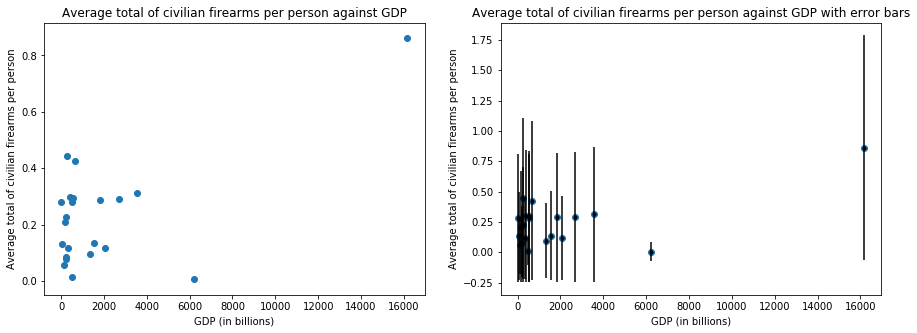


**Figure 2a**: The average total number of civilian firearms per person vs. GDP. 
The point in the top right is the US which has the highest GDP and number of civilian firearms per person.

**Figure 2b**: The same plot as Figure 2a, but with error bars.


In [86]:
pl.figure(figsize=(15,5)) 

# Select data to plot
x, y = df_.gdp / 1e9, df_["Average total all civilian firearms"] / df_['pop']

# Plot without error bars
pl.subplot(1, 2, 1)
pl.scatter(x, y)
pl.title('Average total of civilian firearms per person against GDP')
pl.xlabel("GDP (in billions)")
pl.ylabel("Average total of civilian firearms per person")

# Plot with error bars
pl.subplot(1, 2, 2)
pl.scatter(x, y)
pl.errorbar(x, y, yerr=np.sqrt(y * 1.), fmt='.', color='k')
pl.title('Average total of civilian firearms per person against GDP with error bars')
pl.xlabel("GDP (in billions)")
pl.ylabel("Average total of civilian firearms per person")
pl.show()
Markdown('''
**Figure 2a**: The average total number of civilian firearms per person vs. GDP. 
The point in the top right is the US which has the highest GDP and number of civilian firearms per person.

**Figure 2b**: The same plot as Figure 2a, but with error bars.
''')

#### In both plots above, the US is a clear outlier from the rest of the countries shown. This is most likely ascribed to a cultural pattern where many citizens' fragile masculinity is tied to their firearms.

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

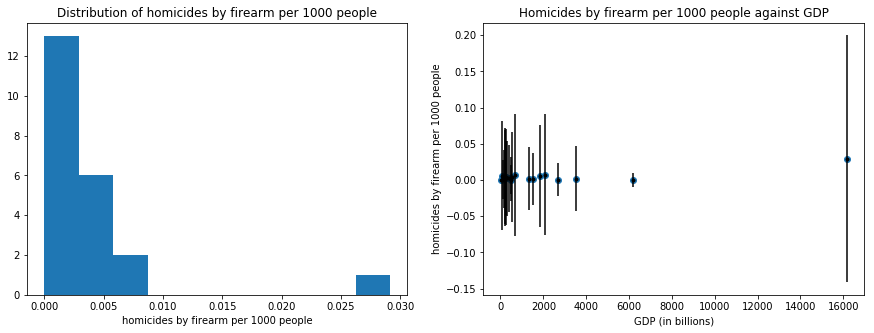


**Figure 3a**: The distribution of homicides by firearm per 1000 people. The rightmost bar is the US.

**Figure 3b**: The homicides by firearm per 1000 people vs. GDP. 
The point on the right is the US which has the highest GDP and number of homicides by firearm per 1000 people.


In [88]:
pl.figure(figsize=(15,5)) 

# Select data
x, y = df_.gdp / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1e3

# Plot distribution
pl.subplot(1, 2, 1)
pl.hist(y)
pl.title('Distribution of homicides by firearm per 1000 people')
pl.xlabel('homicides by firearm per 1000 people')

# Plot against gdp
pl.subplot(1, 2, 2)
pl.scatter(x, y)
pl.errorbar(x, y, yerr=np.sqrt(y * 1.), fmt='.', color='k')
pl.title('Homicides by firearm per 1000 people against GDP')
pl.xlabel("GDP (in billions)")
pl.ylabel("homicides by firearm per 1000 people")
pl.show()
Markdown('''
**Figure 3a**: The distribution of homicides by firearm per 1000 people. The rightmost bar is the US.

**Figure 3b**: The homicides by firearm per 1000 people vs. GDP. 
The point on the right is the US which has the highest GDP and number of homicides by firearm per 1000 people.
''')

#### The US is a clear outlier in both plots.

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


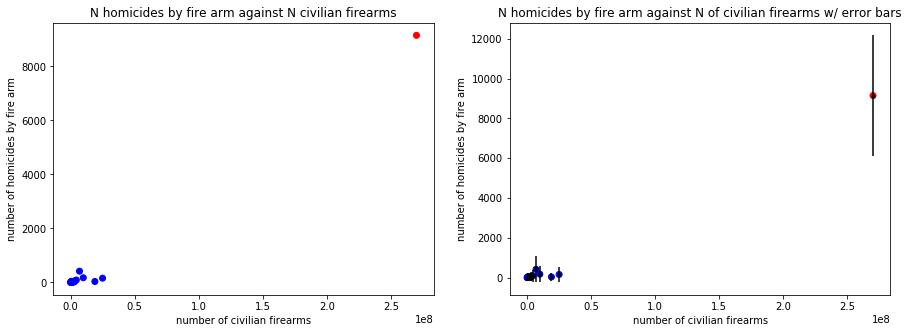


**Figure 4a**: The number of homicides by fire arm vs. the number of civilian firearms. 
The point in the top right is the US which has both the highest number of homicides by fire arm 
and number of civilian firearms per person.

**Figure 4b**: The same plot as Figure 4a, but with error bars.


In [89]:
pl.figure(figsize=(15,5)) 

# Select data and colors
x, y = df_['Average total all civilian firearms'], df_['Number of homicides by firearm']
colors = (df_['Country Name'] == 'United States').map({0:'b', 1:'r'})

# Plot without error bars
pl.subplot(1, 2, 1)
pl.scatter(x, y, color=colors)
pl.title('N homicides by fire arm against N civilian firearms')
pl.xlabel("number of civilian firearms")
pl.ylabel("number of homicides by fire arm")

# Plot with error bars
pl.subplot(1, 2, 2)
pl.scatter(x, y, color=colors)
pl.errorbar(x, y, yerr=np.sqrt(y * 1000.), fmt='.', color='k')
pl.title('N homicides by fire arm against N of civilian firearms w/ error bars')
pl.xlabel("number of civilian firearms")
pl.ylabel("number of homicides by fire arm")
pl.show()
Markdown('''
**Figure 4a**: The number of homicides by fire arm vs. the number of civilian firearms. 
The point in the top right is the US which has both the highest number of homicides by fire arm 
and number of civilian firearms per person.

**Figure 4b**: The same plot as Figure 4a, but with error bars.
''')

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


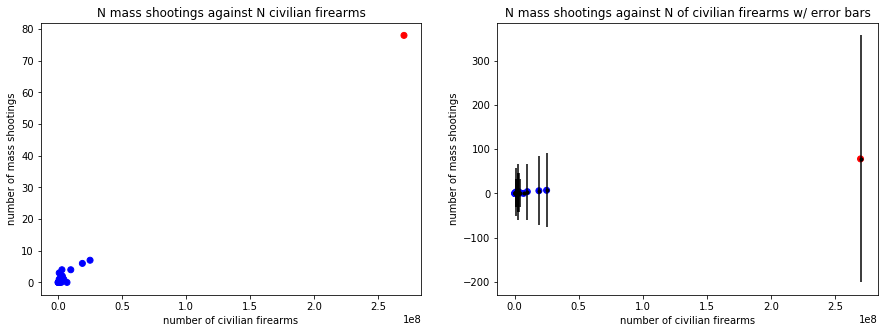


**Figure 5a**: The number of mass shootings vs. the number of civilian firearms. 
The point in the top right is the US which has both the highest number of mass shootings 
and number of civilian firearms per person.

**Figure 5b**: The same plot as Figure 5a, but with error bars.


In [90]:
pl.figure(figsize=(15,5)) 

# Select data and colors
x, y = df_['Average total all civilian firearms'], df_['Number of mass shootings']
colors = (df_['Country Name'] == 'United States').map({0:'b', 1:'r'})

# Plot without error bars
pl.subplot(1, 2, 1)
pl.scatter(x, y, color=colors)
pl.title('N mass shootings against N civilian firearms')
pl.xlabel("number of civilian firearms")
pl.ylabel("number of mass shootings")

# Plot with error bars
pl.subplot(1, 2, 2)
pl.scatter(x, y, color=colors)
pl.errorbar(x, y, yerr=np.sqrt(y * 1000.), fmt='.', color='k')
pl.title('N mass shootings against N of civilian firearms w/ error bars')
pl.xlabel("number of civilian firearms")
pl.ylabel("number of mass shootings")
pl.show()
Markdown('''
**Figure 5a**: The number of mass shootings vs. the number of civilian firearms. 
The point in the top right is the US which has both the highest number of mass shootings 
and number of civilian firearms per person.

**Figure 5b**: The same plot as Figure 5a, but with error bars.
''')

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [34]:
import seaborn as sns
import statsmodels.api as sm

/Users/bensteers/Desktop/Storage/NYU/Fall2017/PUI/.direnv/python-3.5.2/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [99]:
# Select data and colors
x, y = df_['Average total all civilian firearms'], df_['Number of mass shootings'] / df_['pop'] * 1e3
colors = (df_['Country Name'] == 'United States').map({0:'b', 1:'r'})

### Develop a solution for variable weighting when errors equal zero.
The original equation, $w=1/e$, is a discontinuous equation, approaching $\infty$ as $x$ approaches zero. To fix this, the equation is approximated by the following (general form) equation.
$$w = 1 / (e^2+P^{-b})^{1/b}$$

$w$: weights

$e$: errors

$P$: The peak value at $x=0$.

$b$: The spread of the peak. Higher values yield a more narrow peak. 2 is used to be most symmetric with respect to the power applied to the errors.

The specific form of the equation used in this problem is:
$$w = 1 / \sqrt{e^2+0.01}$$

In [100]:
# Defining error weight function
def error_weighting(e, peak=10, scale=2):
    '''Perform error weighting, avioding the undefined case where error is zero.
    
    Arguments:
        e (float or np.array): the error(s) to be used for weighting
        peak (float, default: 10): The maximum value to use in place of infinity
        scale (float, default: 2): The power that the denominator is set to. 
                                   Higher values yield a narrower weighting function
    returns:
        weights (same type as e): The calculated weights
    '''
    return 1. / (np.square(e) + float(peak)**(-scale)) ** (1./scale)

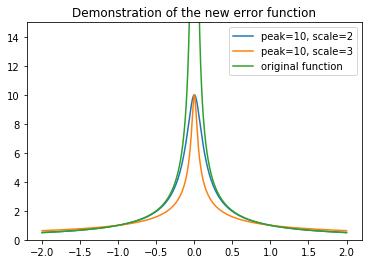


**Figure 6**: This plot shows the new error function as it compares to the old error function. As it can be seen, 
the new weighting function closely follows the original function until the original function begins diverging 
around 0.2.


In [101]:
# Demonstrating the new error weighting function
err_x = np.linspace(-2, 2, 1000)
pl.plot(err_x, error_weighting(err_x), label='peak=10, scale=2')
pl.plot(err_x, error_weighting(err_x, scale=3), label='peak=10, scale=3')
pl.plot(err_x, np.abs(1/err_x), label='original function')
pl.title('Demonstration of the new error function')
pl.ylim([0, 15])
pl.legend()
pl.show()
Markdown("""
**Figure 6**: This plot shows the new error function as it compares to the old error function. As it can be seen, 
the new weighting function closely follows the original function until the original function begins diverging 
around 0.2.
""")

In [102]:
ols_model = sm.OLS(y, x).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.034
Date:                Tue, 17 Oct 2017   Prob (F-statistic):              0.169
Time:                        19:49:14   Log-Likelihood:                 157.04
No. Observations:                  22   AIC:                            -312.1
Df Residuals:                      21   BIC:                            -311.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Average total all civilian firearms  1.031e-12   7.23e-13      1.426      0.169   -4.72e-13    2.53e-12
==============================================================================
Omnibus:                       24.894   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.074
Skew:                           2.158   Prob(JB):                     5.40e-09
Kurtosis:                       7.787   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
wls_model = sm.OLS(y, x, weights=error_weighting(np.sqrt(y))).fit()
wls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.034
Date:                Tue, 17 Oct 2017   Prob (F-statistic):              0.169
Time:                        19:49:17   Log-Likelihood:                 157.04
No. Observations:                  22   AIC:                            -312.1
Df Residuals:                      21   BIC:                            -311.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Average total all civilian firearms  1.031e-12   7.23e-13      1.426      0.169   -4.72e-13    2.53e-12
==============================================================================
Omnibus:                       24.894   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.074
Skew:                           2.158   Prob(JB):                     5.40e-09
Kurtosis:                       7.787   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

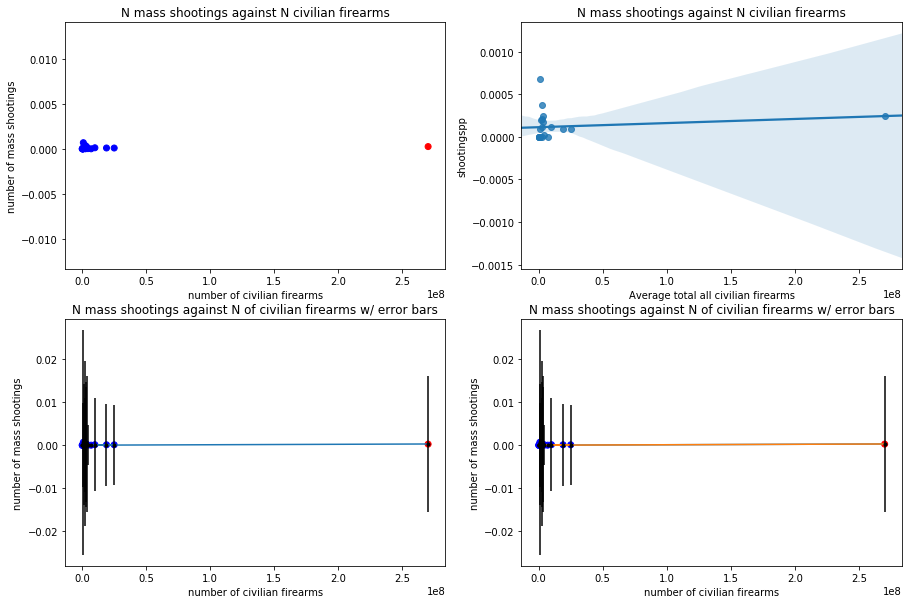

In [104]:
pl.figure(figsize=(15,10)) 

# Plot without error bars
pl.subplot(2, 2, 1)
pl.scatter(x, y, color=colors)
pl.title('N mass shootings against N civilian firearms')
pl.xlabel("number of civilian firearms")
pl.ylabel("number of mass shootings")

# Plot seaborn regression
pl.subplot(2, 2, 2)
sns.regplot(x='Average total all civilian firearms', y='shootingspp', data=df_)
pl.title('N mass shootings against N civilian firearms')

# Plot of OLS fit
pl.subplot(2, 2, 3)
pl.scatter(x, y, color=colors)
pl.errorbar(x, y, yerr=np.sqrt(y), fmt='.', color='k')
pl.plot(x, ols_model.fittedvalues)
pl.title('N mass shootings against N of civilian firearms w/ error bars')
pl.xlabel("number of civilian firearms")
pl.ylabel("number of mass shootings")

# Plot of OLS and WLS fit
pl.subplot(2, 2, 4)
pl.scatter(x, y, color=colors)
pl.errorbar(x, y, yerr=np.sqrt(y), fmt='.', color='k')
pl.plot(x, ols_model.fittedvalues)
pl.plot(x, wls_model.fittedvalues)
pl.title('N mass shootings against N of civilian firearms w/ error bars')
pl.xlabel("number of civilian firearms")
pl.ylabel("number of mass shootings")
pl.show()

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



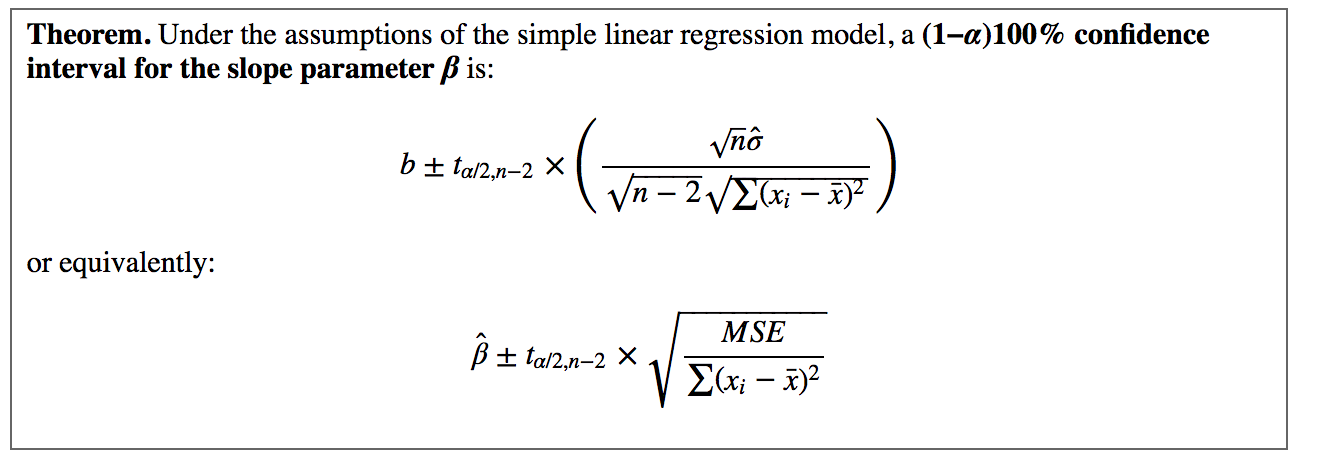

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

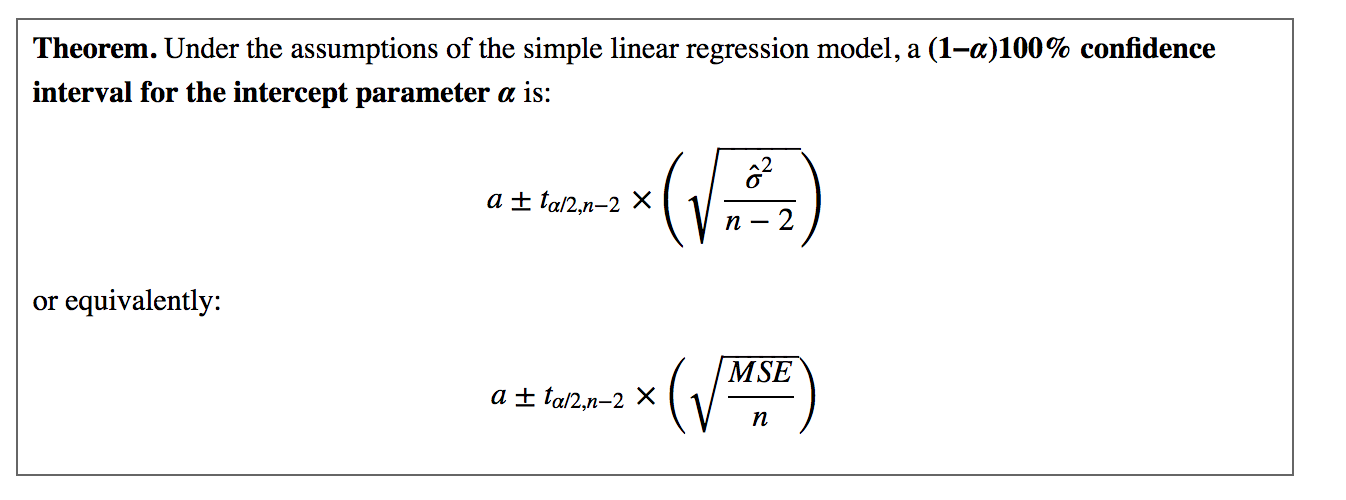

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

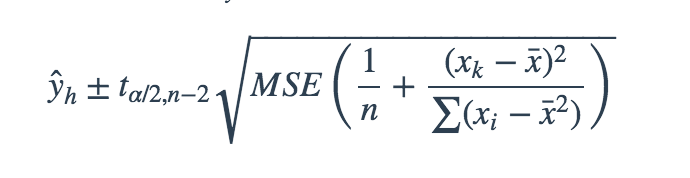

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

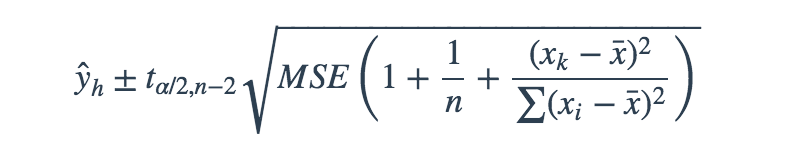

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

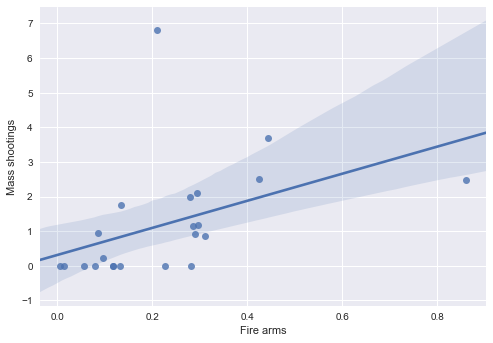

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

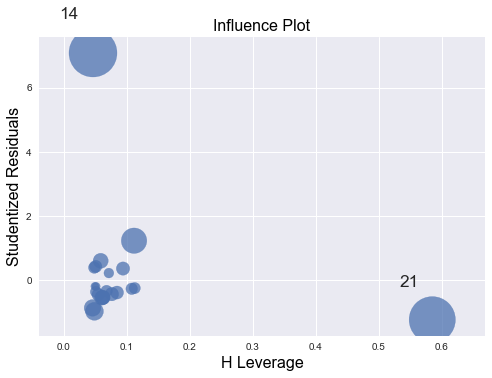

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings